In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json')
coord=pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/es/station_information.json')

In [20]:
coord['data']['stations'][620]

{'has_kiosk': True,
 'lat': 38.883318,
 'name': '53rd & D St SE/C.W. Harris Elementary',
 'short_name': '31671',
 'eightd_has_key_dispenser': False,
 'capacity': 19,
 'rental_methods': ['CREDITCARD', 'KEY'],
 'station_type': 'classic',
 'lon': -76.925315,
 'eightd_station_services': [],
 'rental_uris': {'android': 'https://dc.lft.to/lastmile_qr_scan',
  'ios': 'https://dc.lft.to/lastmile_qr_scan'},
 'external_id': '12b1c990-90e7-4fef-a5b9-c78d4c81af96',
 'electric_bike_surcharge_waiver': False,
 'station_id': '659',
 'legacy_id': '659'}

In [19]:
ids=[]
lats=[]
longs=[]
region=[]
for i in range(len(coord['data']['stations'])):
    ids.append(coord['data']['stations'][i]['short_name'])
    lats.append(coord['data']['stations'][i]['lat'])
    longs.append(coord['data']['stations'][i]['lon'])
    if i not in [601, 620]:
        region.append(coord['data']['stations'][i]['region_id'])
    else:
        region.append(0)

In [29]:
np.sum(pd.isna(ids))
#no NaN's to be found here

0

In [21]:
df_stat = pd.DataFrame (ids,columns=['Station IDs'])
df_stat['Latitude']=lats
df_stat['Longitude']=longs
df_stat['Region']=region

In [25]:
bikes_available=[]
has_bikes=[]
empty_stat=[]
for i in range(621):
        if (df['data']['stations'][i]['is_renting'])==1:
            bikes_available.append(df['data']['stations'][i]['num_bikes_available']+df['data']['stations'][i]['num_ebikes_available'])
            has_bikes.append(int(bikes_available[-1]!=0))
            if(bikes_available[-1])==0:
                empty_stat.append(df['data']['stations'][i]['station_id'])

In [36]:
empty_stat

['7',
 '8',
 '26',
 '56',
 '102',
 '130',
 '140',
 '158',
 '166',
 '167',
 '182',
 '206',
 '255',
 '266',
 '332',
 '349',
 '400',
 '482',
 '487',
 '493',
 '495',
 '509',
 '645',
 '646',
 '648',
 '659']

In [31]:
bike_data1=pd.read_csv('201901-capitalbikeshare-tripdata.csv', sep=',')
bike_data2=pd.read_csv('201902-capitalbikeshare-tripdata.csv', sep=',')
bike_data3=pd.read_csv('201903-capitalbikeshare-tripdata.csv', sep=',')
bike_data4=pd.read_csv('201904-capitalbikeshare-tripdata.csv', sep=',')
bike_data5=pd.read_csv('201905-capitalbikeshare-tripdata.csv', sep=',')
bike_data6=pd.read_csv('201906-capitalbikeshare-tripdata.csv', sep=',')
bike_data7=pd.read_csv('201907-capitalbikeshare-tripdata', sep=',')
bike_data8=pd.read_csv('201908-capitalbikeshare-tripdata.csv', sep=',')
bike_data9=pd.read_csv('201909-capitalbikeshare-tripdata.csv', sep=',')
bike_data10=pd.read_csv('201910-capitalbikeshare-tripdata.csv', sep=',')
bike_data11=pd.read_csv('201911-capitalbikeshare-tripdata.csv', sep=',')
bike_data12=pd.read_csv('201912-capitalbikeshare-tripdata.csv', sep=',')

In [32]:
bike_data=pd.concat([bike_data1,bike_data2,bike_data3,bike_data4,bike_data5,bike_data6,bike_data7,bike_data8,bike_data9,bike_data10,bike_data11,bike_data12 ])

In [33]:
bike_data['Start date']=pd.to_datetime(bike_data['Start date'])
bike_data['End date']=pd.to_datetime(bike_data['End date'])

In [38]:
from collections import Counter
station_list=list(set(bike_data['Start station number']))
df_stat2 = pd.DataFrame (station_list,columns=['Station'])
number_start=[]
z=Counter(bike_data['Start station number'])
for j in station_list:
    number_start.append(z[j])
df_stat2['Number of rides starting']=number_start
number_end=[]
z=Counter(bike_data['End station number'])
for j in station_list:
    number_end.append(z[j])
df_stat2['Number of rides ending']=number_end
df_stat2

,Station,Number of rides starting,Number of rides ending
0,0,498,487
1,31000,1563,1380
2,31001,1993,1810
3,31002,5451,5886
4,31003,4338,4402
...,...,...,...
577,32605,427,432
578,32606,662,621
579,32607,370,438
580,32608,353,373


In [70]:
latitudes=[0]
longitudes=[0]
for i in range(1,582):
    q=0
    for j in range(621):
        if df_stat2['Station'][i]==int(df_stat['Station IDs'][j]):
            latitudes.append(df_stat['Latitude'][j])
            longitudes.append(df_stat['Longitude'][j])
            q=1
    if q==0:
        latitudes.append(0)
        longitudes.append(0)
df_stat2['Latitude']=latitudes
df_stat2['Longitude']=longitudes

In [71]:
df_lats=df_stat2[df_stat2['Latitude']!=0]
df_lats

,Station,Number of rides starting,Number of rides ending,Latitude,Longitudes,Longitude
1,31000,1563,1380,38.858971,-77.053230,-77.053230
2,31001,1993,1810,38.857250,-77.053320,-77.053320
3,31002,5451,5886,38.856425,-77.049232,-77.049232
4,31003,4338,4402,38.860170,-77.049593,-77.049593
5,31004,2127,2202,38.857866,-77.059490,-77.059490
...,...,...,...,...,...,...
577,32605,427,432,38.883601,-77.173438,-77.173438
578,32606,662,621,38.878085,-77.153953,-77.153953
579,32607,370,438,38.879720,-77.178408,-77.178408
580,32608,353,373,38.885434,-77.173605,-77.173605


In [54]:
#df_stat2['Station'][2]==
df_stat['Station IDs'][1]

'31001'

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

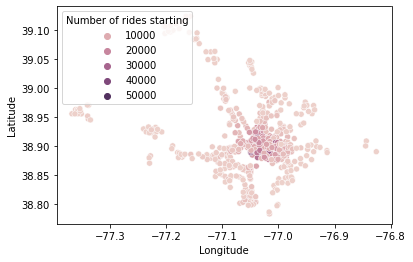

In [83]:
sns.scatterplot(data=df_lats, y='Latitude', x='Longitude', hue='Number of rides starting', sizes=(2,2))


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

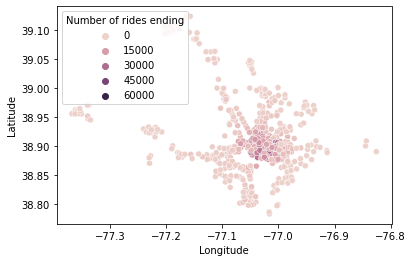

In [84]:
sns.scatterplot(data=df_lats, y='Latitude', x='Longitude', hue='Number of rides ending', sizes=(2,2))


In [96]:
df_lats['Bike Drain']=df_lats['Number of rides ending']-df_lats['Number of rides starting']


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

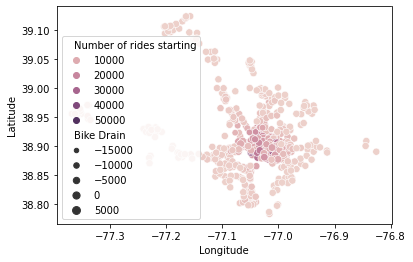

In [95]:
sns.scatterplot(data=df_lats, y='Latitude', x='Longitude', hue='Number of rides starting', size='Bike Drain')